# Bonus Challenge: Spiral Data Classification

Now that you completed Challenge 2, you know you can use the Tensorflow Playground to experiment the hyperparameters of your deep learning model. If you are brave enough to take on this challenge, we present you the spiral data generated by codes and you will replicate your model built visually in the Tensorflow Playground with Python codes.

Below are the codes to generate the spiral dataset. Read the remarks and execute the codes.

In [7]:
from math import hypot, cos, sin
import numpy as np
import pandas as pd
import math
"""
A function to generate X/Y data points that will form a spiral.
"""
def spiral(radius, step, resolution=.1, angle=0.0, start=0.0):
    dist = start
    coords=[]
    while dist*hypot(cos(angle),sin(angle))<radius:
        cord=[]
        cord.append(dist*cos(angle))
        cord.append(dist*sin(angle))
        coords.append(cord)
        dist+=step
        angle+=resolution
    return coords

In [8]:
# Generate two sets of spiral data points with opposite angles
data_1 = np.array(spiral(1000, 5, angle=0))
data_2 = np.array(spiral(1000, 5, angle=180))

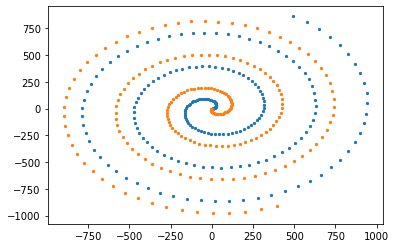

In [9]:
# Plot the two datasets to visualize the spirals

import matplotlib.pyplot as plt

a, b = data_1.T
plt.scatter(a, b, s=5)

aa, bb = data_2.T
plt.scatter(aa, bb, s=5)

plt.show()

In [10]:
# Combine the two spiral datasets into one

df1 = pd.DataFrame(data=data_1, columns=["X", "Y"])
df1["CLASS"] = 0

df2 = pd.DataFrame(data=data_2, columns=["X", "Y"])
df2["CLASS"] = 1

df = df1.append(df2)
df['CLASS'].value_counts()

1    200
0    200
Name: CLASS, dtype: int64

In [14]:
df.head()

,X,Y,CLASS
0,0.000000,0.000000,0
1,4.975021,0.499167,0
2,9.800666,1.986693,0
3,14.330047,4.432803,0
4,18.421220,7.788367,0


Now, build a neural network with Tensorflow to classify `df`. See how low data loss and how high accuracy can you achieve!

In [95]:
# your code here
import pandas as pd
import numpy as np
import tensorflow as tf

final_df = df.sample(frac=1).reset_index(drop=True)

y = 'CLASS'

X_data = final_df.drop(y, axis =1).to_numpy()
y_data = final_df[y].to_numpy()
X_data = tf.keras.utils.normalize(X_data, axis=1)

split = math.ceil(len(X_data)*.85)

X_train = X_data[:split]
X_test = X_data[split:]
y_train = y_data[:split]
y_test = y_data[split:]


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(340, 2) (60, 2) (340,) (60,)


In [121]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150)

Train on 340 samples
Epoch 1/150
340/340 [==============================] - 0s 891us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 2/150
340/340 [==============================] - 0s 76us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 3/150
340/340 [==============================] - 0s 88us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 4/150
340/340 [==============================] - 0s 71us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 5/150
340/340 [==============================] - 0s 89us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 6/150
340/340 [==============================] - 0s 76us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 7/150
340/340 [==============================] - 0s 88us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 8/150
340/340 [==============================] - 0s 100us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 9/150
340/340 [==============================] - 0s 94us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 10/150
340/340 [===================

340/340 [==============================] - 0s 68us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 79/150
340/340 [==============================] - 0s 100us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 80/150
340/340 [==============================] - 0s 97us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 81/150
340/340 [==============================] - 0s 85us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 82/150
340/340 [==============================] - 0s 94us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 83/150
340/340 [==============================] - 0s 82us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 84/150
340/340 [==============================] - 0s 91us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 85/150
340/340 [==============================] - 0s 73us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 86/150
340/340 [==============================] - 0s 78us/sample - loss: 0.6931 - accuracy: 0.5088
Epoch 87/150
340/340 [==============================] - ETA: 0s - l

In [122]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss)
print(val_acc)

60/60 [==============================] - 0s 1ms/sample - loss: 0.6931 - accuracy: 0.4500
0.6931471824645996
0.45


In [ ]:
print("I honestly tried a lot of combinations...but I couldn't figure out the correct one")